# Train data Loading

In [1]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("twitter_training.csv")

In [3]:
# Label the columns
df.columns = ["tweet_id","place", "sentiments", "tweets"]
df = df.drop("place", axis=1)
df

,tweet_id,sentiments,tweets
0,2401,Positive,I am coming to the borders and I will kill you...
1,2401,Positive,im getting on borderlands and i will kill you ...
2,2401,Positive,im coming on borderlands and i will murder you...
3,2401,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Positive,im getting into borderlands and i can murder y...
...,...,...,...
74676,9200,Positive,Just realized that the Windows partition of my...
74677,9200,Positive,Just realized that my Mac window partition is ...
74678,9200,Positive,Just realized the windows partition of my Mac ...
74679,9200,Positive,Just realized between the windows partition of...


# Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    74681 non-null  int64 
 1   sentiments  74681 non-null  object
 2   tweets      73995 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
# Identify inconsistencies
#The code `duplicate_rows = df[df.duplicated()]` is identifying and storing the duplicate rows in the DataFrame `df`. The `df.duplicated()` function returns a boolean Series indicating whether each row is a duplicate or not. By passing this boolean Series as a filter to the DataFrame `df`, only the duplicate rows are selected and stored in the variable `duplicate_rows`.
duplicate_rows = df[df.duplicated()]
duplicate_rows

,tweet_id,sentiments,tweets
19,2404,Positive,that was the first borderlands session in a lo...
25,2405,Negative,The biggest disappointment of my life came a y...
50,2409,Neutral,Blaming Sight for Tardiness! A little bit of b...
63,2411,Neutral,.. [
145,2425,Negative,"""What a bitch!"""
...,...,...,...
74504,9171,Neutral,This benchmarking comparison between Oculus Qu...
74509,9172,Positive,@ NVIDIAGeForce @ nvidia
74588,9185,Neutral,Heard people are having issues with ordering t...
74618,9190,Positive,This news about the Nvidia 3000 series is ligi...


In [6]:
# Identify missing values
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = df.isna().sum()
missing_values

tweet_id        0
sentiments      0
tweets        686
dtype: int64

In [7]:
# removing duplicates

df.drop_duplicates(inplace = True)

# Remove the duplicate rows
df = df.drop_duplicates()

df['tweets'] = df['tweets'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
df["tweets"] = df['tweets'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
df["tweets_new"] = df["tweets"].apply(tokenizer.tokenize)
df["tweets_new"] = df["tweets_new"].apply(convert_list_to_str)


df

{'had', 'before', 'his', 'because', 'whom', 'on', 'weren', 'mightn', 'o', 'we', "needn't", 'i', 'mustn', 'up', "that'll", 'now', 'ourselves', 'between', 'having', 'wasn', 'himself', 'through', 'all', 'such', 'hasn', 'did', 'most', "haven't", 'by', 'your', 'not', 'out', 'their', 'are', 'only', 'our', 'will', 'each', 'after', 'he', "should've", 'few', 'when', "you'd", 'hadn', 'ain', 'm', "you'll", 'there', 'off', 'as', 'yours', 'be', 'same', 'with', 'a', "wasn't", 'but', 'more', 'here', "mustn't", 'from', 'how', 'been', 'don', 't', "mightn't", 'during', 'am', 'shouldn', 'above', 'down', 'too', 'him', 'at', "shan't", 've', 'if', 'these', 'yourselves', 'haven', 'no', 'those', 'were', 'you', 'shan', 'which', 'other', 'yourself', 'she', 'll', 'couldn', 'this', 'until', 'further', "you're", 'nor', 'some', 'itself', "couldn't", 'my', 'doing', 'an', "doesn't", "aren't", 'below', 'needn', 'own', 'it', 'won', 'why', 'isn', 'myself', 'who', 'have', "don't", 'of', 'is', "she's", 'do', 'to', 'wouldn

,tweet_id,sentiments,tweets,tweets_new
0,2401,Positive,"coming borders kill all,",coming borders kill all
1,2401,Positive,"im getting borderlands kill all,",im getting borderlands kill all
2,2401,Positive,"im coming borderlands murder all,",im coming borderlands murder all
3,2401,Positive,"im getting borderlands 2 murder all,",im getting borderlands 2 murder all
4,2401,Positive,"im getting borderlands murder all,",im getting borderlands murder all
...,...,...,...,...
74676,9200,Positive,realized windows partition mac like 6 years be...,realized windows partition mac like 6 years be...
74677,9200,Positive,realized mac window partition 6 years behind n...,realized mac window partition 6 years behind n...
74678,9200,Positive,realized windows partition mac 6 years behind ...,realized windows partition mac 6 years behind ...
74679,9200,Positive,realized windows partition mac like 6 years be...,realized windows partition mac like 6 years be...


In [8]:

lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    # tokenizer = RegexpTokenizer(r'\w+')
    # words = word_tokenize(sentence)
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(
        word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return ' '.join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df["tweets_new"] = df["tweets_new"].apply(lemmatize_sentence)
print(df)

df["tweets"] = df["tweets_new"]

# df["tweets"] = df["tweets_new"].apply(convert_list_to_str)
df = df.drop(columns=["tweets_new"])
# print(df)

#fill 0 in mum
df['tweets'] = df['tweets'].fillna(0)

# Save the dataframe
df.to_csv("tweet_clean.csv", index=False)
df


       tweet_id sentiments                                             tweets  \
0          2401   Positive                           coming borders kill all,   
1          2401   Positive                   im getting borderlands kill all,   
2          2401   Positive                  im coming borderlands murder all,   
3          2401   Positive               im getting borderlands 2 murder all,   
4          2401   Positive                 im getting borderlands murder all,   
...         ...        ...                                                ...   
74676      9200   Positive  realized windows partition mac like 6 years be...   
74677      9200   Positive  realized mac window partition 6 years behind n...   
74678      9200   Positive  realized windows partition mac 6 years behind ...   
74679      9200   Positive  realized windows partition mac like 6 years be...   
74680      9200   Positive  like windows partition mac like 6 years behind...   

                           

,tweet_id,sentiments,tweets
0,2401,Positive,come border kill all
1,2401,Positive,im get borderland kill all
2,2401,Positive,im come borderland murder all
3,2401,Positive,im get borderland 2 murder all
4,2401,Positive,im get borderland murder all
...,...,...,...
74676,9200,Positive,realize window partition mac like 6 year behin...
74677,9200,Positive,realize mac window partition 6 year behind nvi...
74678,9200,Positive,realize window partition mac 6 year behind nvi...
74679,9200,Positive,realize window partition mac like 6 year behin...


In [9]:
#check for duplicates
df.duplicated().sum()

7133

In [10]:
#check null
df['tweets'].isnull().sum()

0

# Exploratory data analysis (EDA)

In [11]:
#`df.describe().T` is transposing the output of the `describe()` method on a DataFrame `df`. The `describe()` method provides summary statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles. By applying `.T` after `describe()`, the output is transposed, meaning the rows become columns and vice versa. This can be useful for better readability or for further analysis of the summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,71981.0,6437.452383,3743.194317,1.0,3199.0,6434.0,9607.0,13200.0


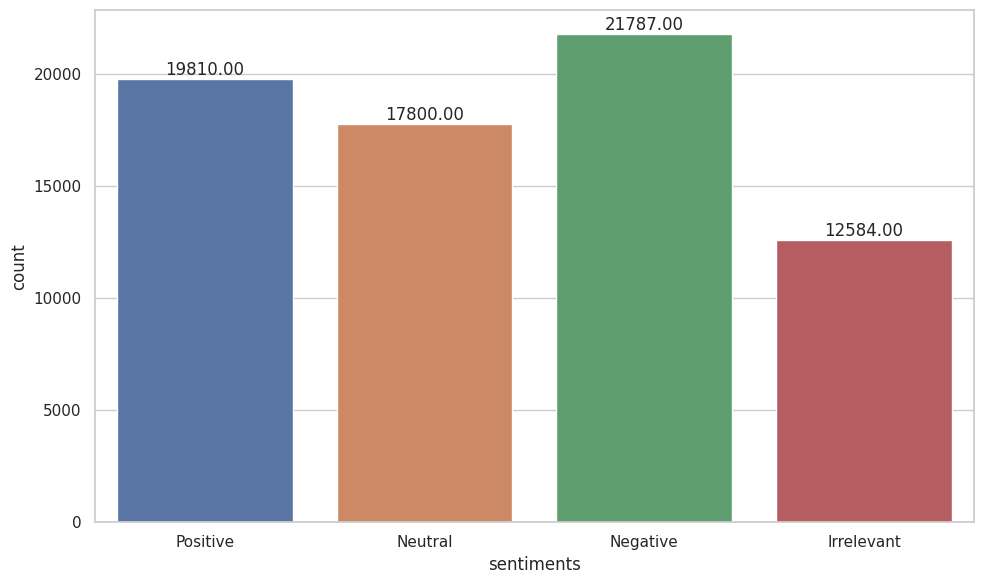

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiments', data=df)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()


In [13]:


df_copy = df.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['sentiments']
df_copy[object_cols] = df_copy[object_cols].astype(str)

df_copy[object_cols] = ordinal_encoder.fit_transform(df_copy[object_cols])

df_copy.head()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['tweet_id', 'sentiments', 'tweets']
df[object_cols] = df[object_cols].astype(str)

df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df.head()


,tweet_id,sentiments,tweets
0,4254.0,3.0,10535.0
1,4254.0,3.0,28069.0
2,4254.0,3.0,28038.0
3,4254.0,3.0,28068.0
4,4254.0,3.0,28070.0


In [14]:
print(df['sentiments'].nunique())

4


# download transformers and tensorflow

In [15]:
!pip install transformers

In [16]:
!pip install tensorflow

# BERT IMPLEMENTATION AND TRAINING

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Split the DataFrame into training and validation sets
train_df, test_df = train_test_split(df_copy, test_size=0.2, random_state=0)

# Define labels as a list of sentiment labels from your DataFrame
train_labels = train_df['sentiments'].values.tolist()
test_labels = test_df['sentiments'].values.tolist()


num_labels = len(np.unique(train_labels))

# Instantiate the BERT model and tokenizer
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

from transformers import BertConfig

model_name = "bert-base-uncased"
config = BertConfig.from_pretrained(model_name)
max_seq_lengths = config.max_position_embeddings
embedding_dims = config.hidden_size

print("Max Sequence Length:", max_seq_lengths)
print("Embedding Dimension:", embedding_dims)


# precision and recall
precision = Precision()
recall = Recall()

# Prepare the inputs for the training set
train_input_ids, train_attention_masks, train_encoded_labels = [], [], []

for tweet, label in zip(train_df['tweets'], train_labels):
    inputs = tokenizer.encode_plus(tweet, add_special_tokens=True, max_length=128, pad_to_max_length=True,
                                   return_attention_mask=True, return_token_type_ids=True)
    train_input_ids.append(inputs['input_ids'])
    train_attention_masks.append(inputs['attention_mask'])
    train_encoded_labels.append(label)

# Convert lists to tensors
train_input_ids = tf.convert_to_tensor(train_input_ids)
train_attention_masks = tf.convert_to_tensor(train_attention_masks)


le = LabelEncoder()
train_encoded_labels = le.fit_transform(train_encoded_labels)


train_encoded_labels = to_categorical(train_encoded_labels)

# Prepare the inputs for the testing set
test_input_ids, test_attention_masks, test_encoded_labels = [], [], []

for tweet, label in zip(test_df['tweets'], test_labels):
    inputs = tokenizer.encode_plus(tweet, add_special_tokens=True, max_length=128, pad_to_max_length=True,
                                   return_attention_mask=True, return_token_type_ids=True)
    test_input_ids.append(inputs['input_ids'])
    test_attention_masks.append(inputs['attention_mask'])
    test_encoded_labels.append(label)


test_input_ids = tf.convert_to_tensor(test_input_ids)
test_attention_masks = tf.convert_to_tensor(test_attention_masks)


test_encoded_labels = le.transform(test_encoded_labels)

# Convert integer labels to one-hot encoded format
test_encoded_labels = to_categorical(test_encoded_labels)

# Define the batch size
batch_size = 32

# train_embeddings = model.predict([train_input_ids, train_attention_masks])
# test_embeddings = model.predict([test_input_ids, test_attention_masks])




All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Max Sequence Length: 512
Embedding Dimension: 768


In [18]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[precision, recall, 'accuracy'])



In [19]:
# Train the model
history = model.fit(
    x=[train_input_ids, train_attention_masks],
    y=train_encoded_labels,
    batch_size=batch_size,
    epochs=10,
    validation_split=0.2
)
# train_embeddings = model.predict([train_input_ids, train_attention_masks])
# test_embeddings = model.predict([test_input_ids, test_attention_masks])

Epoch 1/10
1440/1440 [==============================] - 507s 315ms/step - loss: 0.9290 - precision: 0.6242 - recall: 0.5964 - accuracy: 0.6197 - val_loss: 0.6927 - val_precision: 0.6863 - val_recall: 0.7533 - val_accuracy: 0.7331
Epoch 2/10
1440/1440 [==============================] - 441s 306ms/step - loss: 0.4471 - precision: 0.7338 - recall: 0.8732 - accuracy: 0.8346 - val_loss: 0.4330 - val_precision: 0.7472 - val_recall: 0.8883 - val_accuracy: 0.8452
Epoch 3/10
1440/1440 [==============================] - 441s 306ms/step - loss: 0.2182 - precision: 0.8116 - recall: 0.9419 - accuracy: 0.9162 - val_loss: 0.3714 - val_precision: 0.7827 - val_recall: 0.9123 - val_accuracy: 0.8797
Epoch 4/10
1440/1440 [==============================] - 441s 306ms/step - loss: 0.1430 - precision: 0.8539 - recall: 0.9557 - accuracy: 0.9431 - val_loss: 0.3876 - val_precision: 0.7961 - val_recall: 0.9190 - val_accuracy: 0.8867
Epoch 5/10
1440/1440 [==============================] - 442s 307ms/step - loss: 

In [20]:
# Print the history
print(history.history)

{'loss': [0.9289868474006653, 0.44705262780189514, 0.2181539386510849, 0.14302758872509003, 0.12103457003831863, 0.10453946143388748, 0.09429619461297989, 0.08926872164011002, 0.08587221801280975, 0.08252977579832077], 'precision': [0.6241877675056458, 0.7337650656700134, 0.8115624785423279, 0.8538818359375, 0.8733003735542297, 0.8847152590751648, 0.9019675850868225, 0.9018288850784302, 0.9041559100151062, 0.9134458899497986], 'recall': [0.59637051820755, 0.8731846809387207, 0.9419106841087341, 0.9557166695594788, 0.959233283996582, 0.9617079496383667, 0.9622723460197449, 0.9633577466011047, 0.9639003872871399, 0.9640089273452759], 'accuracy': [0.6196626424789429, 0.834632158279419, 0.9161872863769531, 0.9430611729621887, 0.9519829750061035, 0.955738365650177, 0.9599279165267944, 0.9614257216453552, 0.963270902633667, 0.9632274508476257], 'val_loss': [0.692663311958313, 0.4329701364040375, 0.37138569355010986, 0.38759395480155945, 0.3790299594402313, 0.36616992950439453, 0.379453957080

In [21]:
# Assuming 'history' is the History object returned by model.fit()
history_dict = history.history

# Print the training accuracy
print("Accuracy: ", history_dict['accuracy'][-1])


Accuracy:  0.9632274508476257


# Validation Accuracy

In [22]:
test_embeddings = model.predict([test_input_ids, test_attention_masks])
from sklearn.metrics import accuracy_score

# Assuming test_encoded_labels are one-hot encoded labels 
# Assuming test_embeddings are the model predictions on the test data

# Convert one-hot encoded labels back to integers
test_predicted_labels = tf.argmax(test_embeddings.logits, axis=1).numpy()
test_true_labels = tf.argmax(test_encoded_labels, axis=1).numpy()

# Calculate  accuracy
accuracy = accuracy_score(test_true_labels, test_predicted_labels)
print("Test Accuracy:", accuracy)

450/450 [==============================] - 48s 100ms/step
Test Accuracy: 0.9028269778426061


In [23]:
# model.save_weights('bert_model.weights')
# model.save('bert_model.json')
# print("Model Saved")

# Test data preprocessing

In [24]:
test_data = pd.read_csv("twitter_validation.csv")
test_data.columns = ["tweet_id","place", "sentiments", "tweets"]
test_data = test_data.drop("place", axis=1)

test_data.drop_duplicates(inplace = True)

# Remove the duplicate rows
test_data = test_data.drop_duplicates()

test_data['tweets'] = test_data['tweets'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
test_data["tweets"] = test_data['tweets'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
test_data["tweets_new"] = test_data["tweets"].apply(tokenizer.tokenize)
test_data["tweets_new"] = test_data["tweets_new"].apply(convert_list_to_str)


lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    # tokenizer = RegexpTokenizer(r'\w+')
    # words = word_tokenize(sentence)
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(
        word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return ' '.join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

test_data["tweets_new"] = test_data["tweets_new"].apply(lemmatize_sentence)
# print(test_data)

test_data["tweets"] = test_data["tweets_new"]

# df["tweets"] = df["tweets_new"].apply(convert_list_to_str)
test_data = test_data.drop(columns=["tweets_new"])
# print(df)

#fill 0 in mum
test_data['tweets'] = test_data['tweets'].fillna(0)

# Save the dataframe
test_data.to_csv("tweet_clean.csv", index=False)


{'had', 'before', 'his', 'because', 'whom', 'on', 'weren', 'mightn', 'o', 'we', "needn't", 'i', 'mustn', 'up', "that'll", 'now', 'ourselves', 'between', 'having', 'wasn', 'himself', 'through', 'all', 'such', 'hasn', 'did', 'most', "haven't", 'by', 'your', 'not', 'out', 'their', 'are', 'only', 'our', 'will', 'each', 'after', 'he', "should've", 'few', 'when', "you'd", 'hadn', 'ain', 'm', "you'll", 'there', 'off', 'as', 'yours', 'be', 'same', 'with', 'a', "wasn't", 'but', 'more', 'here', "mustn't", 'from', 'how', 'been', 'don', 't', "mightn't", 'during', 'am', 'shouldn', 'above', 'down', 'too', 'him', 'at', "shan't", 've', 'if', 'these', 'yourselves', 'haven', 'no', 'those', 'were', 'you', 'shan', 'which', 'other', 'yourself', 'she', 'll', 'couldn', 'this', 'until', 'further', "you're", 'nor', 'some', 'itself', "couldn't", 'my', 'doing', 'an', "doesn't", "aren't", 'below', 'needn', 'own', 'it', 'won', 'why', 'isn', 'myself', 'who', 'have', "don't", 'of', 'is', "she's", 'do', 'to', 'wouldn

In [25]:
print(test_data.head())
td_copy = test_data.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['sentiments']
td_copy[object_cols] = td_copy[object_cols].astype(str)

td_copy[object_cols] = ordinal_encoder.fit_transform(td_copy[object_cols])

td_copy.head()

   tweet_id sentiments                                             tweets
0       352    Neutral  bbc news amazon bos jeff bezos reject claim co...
1      8312   Negative  microsoft pay word function poorly samsungus c...
2      4371   Negative  csgo matchmaking full closet hack truly awful ...
3      4433    Neutral  president slap american face really commit unl...
4      6273   Negative  hi eahelp i ve madeleine mccann cellar past 13...


,tweet_id,sentiments,tweets
0,352,2.0,bbc news amazon bos jeff bezos reject claim co...
1,8312,1.0,microsoft pay word function poorly samsungus c...
2,4371,1.0,csgo matchmaking full closet hack truly awful ...
3,4433,2.0,president slap american face really commit unl...
4,6273,1.0,hi eahelp i ve madeleine mccann cellar past 13...


In [26]:
print(train_df.head())

       tweet_id  sentiments                                             tweets
22945      4332         1.0  hey valvesob steam csgo bad compare doom multi...
65415      6802         2.0  johnson johnson stop selling baby powder u hea...
26796      1005         3.0                                          best show
52258     10577         1.0                                 absolute shit shit
64736      7889         1.0  clintoldenburg eamaddennfl hey i ve notice new...


# Test Data Evaluation

In [27]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from tensorflow.keras.metrics import Accuracy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Split the DataFrame into training and testing sets
train_df, test_df = df_copy, td_copy

# Define labels as a list of sentiment labels from your DataFrame
train_labels = train_df['sentiments'].values.tolist()
test_labels = test_df['sentiments'].values.tolist()


num_labels = len(np.unique(train_labels))

# Instantiate the BERT model and tokenizer
# model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

from transformers import BertConfig

model_name = "bert-base-uncased"
config = BertConfig.from_pretrained(model_name)
max_seq_lengths = config.max_position_embeddings
embedding_dims = config.hidden_size

print("Max Sequence Length:", max_seq_lengths)
print("Embedding Dimension:", embedding_dims)



precision = Precision()
recall = Recall()

# Prepare the inputs for the testing set
test_input_ids, test_attention_masks, test_encoded_labels = [], [], []

for tweet, label in zip(test_df['tweets'], test_labels):
    inputs = tokenizer.encode_plus(tweet, add_special_tokens=True, max_length=128, pad_to_max_length=True,
                                   return_attention_mask=True, return_token_type_ids=True)
    test_input_ids.append(inputs['input_ids'])
    test_attention_masks.append(inputs['attention_mask'])
    test_encoded_labels.append(label)


test_input_ids = tf.convert_to_tensor(test_input_ids)
test_attention_masks = tf.convert_to_tensor(test_attention_masks)

# Convert integer labels to one-hot encoded format
test_encoded_labels = to_categorical(test_encoded_labels)

# Predict using the model on the test data
test_embeddings = model.predict([test_input_ids, test_attention_masks])

# model evaluate
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[precision, recall, 'accuracy'])

# Evaluate the model
print(model.evaluate([test_input_ids, test_attention_masks], test_encoded_labels))



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Max Sequence Length: 512
Embedding Dimension: 768
32/32 [==============================] - 9s 99ms/step - loss: 0.1998 - precision_1: 0.8866 - recall_1: 0.9780 - accuracy: 0.9550
[0.1997501701116562, 0.8865698575973511, 0.977977991104126, 0.954954981803894]


In [28]:
from sklearn.metrics import accuracy_score

# Assuming test_encoded_labels are one-hot encoded labels (as in the previous example)
# Assuming test_embeddings are the model predictions on the test data

# Convert one-hot encoded labels back to integers
test_predicted_labels = tf.argmax(test_embeddings.logits, axis=1).numpy()
test_true_labels = tf.argmax(test_encoded_labels, axis=1).numpy()

# Calculate Test Data accuracy
accuracy = accuracy_score(test_true_labels, test_predicted_labels)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.954954954954955
